# Text Analysis of the A@A solution portal 
Read the big excel file from the portal which includes the text of the solutions

In [2]:
from typing import Tuple
import copy as cp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [34]:
file_path_2 = '../Figures_ver7/'

In [3]:
### TODO Add your file path ###
file_path = '../'
file_path_2 = '../Figures_ver7/'
#File that was extracted from the big database having only labelled data. Relevant = 1 means relevant.
file_name = 'aaa_solution_export 20231029.xlsx'
#file_name = 'local and indenous knowledge_analyses.xlsx'
df = pd.read_excel(file_path + file_name)

In [6]:
df.iloc[:, np.r_[0:2, 34:49]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 17 columns):
 #   Column                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                            --------------  -----  
 0   Title                                                                                                                             88 non-null     object 
 1   Body                                                                                                                              88 non-null     object 
 2   Performance evaluation                                                                                                            62 non-null     object 
 3   Long term project sustainability and maintenance                                                 

In [7]:
df2 = df.iloc[:, np.r_[0:2, 34:49]]

In [8]:
df2

,Title,Body,Performance evaluation,Long term project sustainability and maintenance,Knowledge capacities,[On a 1(min) to 5 (max) Likert scale] How would you evaluate the importance of knowledge capacities in enabling this solution?,Technology capacities,[On a 1(min) to 5 (max) Likert scale] How would you evaluate the importance of technology in enabling this solution?,Political / Legal capacities,[On a 1(min) to 5 (max) Likert scale] How would you evaluate the importance of political motivation in enabling this solution?,Institutional capacities,[On a 1(min) to 5 (max) Likert scale] How would you evaluate the importance of institutional capacities in enabling this solutio,Socio-cultural capacities,[On a 1(min) to 5 (max) Likert scale] How would you evaluate the importance of socio-cultural capacities in enabling this soluti,Barriers and adverse effects,Transformation and future outlook,Potential for upscaling and replication
0,Sustainable watershed management in glacial mo...,The Glaciares+ project was led by NGO CARE Per...,NaN,Glaciares+ long-term sustainability comes from...,Combining scientific knowledge with traditiona...,4.0,NaN,NaN,Strengthening of capabilities at the three lev...,3.0,This solution involved a multi-stakeholder par...,4.0,This project took a community-based adaptation...,4.0,Some barriers include: ;;CARE Peru's implement...,This solution combined NbS and grey infrastruc...,Glaciares+ has built capacities for climate ad...
1,Assessing the Economic Impacts of Disasters al...,This World Bank and Global Facility for Disast...,NaN,This project took into account future climate ...,Research was key to the development of potenti...,4.0,To support the completion of the road inspecti...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,The progress and conduct of the study were sig...,A detailed analysis of secondary data sources ...,NaN
2,"Renewing the flow of water in Mireshelli, Azer...",This project was part of the “Integrated Rural...,NaN,"About 1,500 Khariz are thought to have existed...",Traditional knowledge and skills have long bee...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,This project was implemented to tackle cross-c...,3.0,NaN,NaN,Khariz systems have also been adopted in other...
3,As good as new: Rehabilitating irrigation syst...,This project involved the collaborative effort...,NaN,Rehabilitating irrigation systems can be an im...,NaN,NaN,NaN,NaN,NaN,NaN,Coordination between local partners and the co...,NaN,The local community was engaged in the managem...,NaN,NaN,NaN,Rehabilitating or updating irrigation systems ...
4,Restoring lost water resources in the Shirak r...,This solution was supported by the EU-financed...,NaN,NaN,Training was provided to the local community t...,NaN,Technologies are important in ensuring the chl...,NaN,NaN,NaN,The project once completed was handed over to ...,NaN,NaN,NaN,NaN,NaN,The solution shows benefits in terms of approa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,The Winter Preparedness and Avalanche Readines...,The Winter Preparedness and Avalanche Readines...,Detailed impact analysis has not been done but...,"ClimSnow is jointly operated by Dianeige, Mété...",Research was instrumental in developing ClimSn...,5.0,GIS is critical for bringing together all the ...,5.0,The ClimSnow solution benefitted from support ...,5.0,Implementing ClimSnow requires strong politica...,4.0,"As indicated above, ClimSnow makes it possible...",5.0,"Not so many barriers were encountered, except ...","As indicated above, ClimSnow makes it possible...",ClimSnow is currently not included in national...
84,"ClimSnow, a novel climate service to inform sk...",ClimSnow is a climate service developed to inf...,The performance of ClimSnow has not been evalu...,The municipality is in charge of the maintenan...,The extensive scientific knowledge of experts ...,5.0,"Prior to the implementation of the solution, t...",5.0,There was a mandate for the municipal technica...,3.0,Several associations medi

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
nlp = spacy.load("en_core_web_lg")
from wordcloud import WordCloud

In [10]:
nlp.Defaults.stop_words |= {"climate","change","climatic","changes","climat", "changing", "chang",
                           "project", "projects", "ll","ve","adaptation","area", "component", "management"}

In [11]:
def make_cloud(text,n,stop_words):
    ##This function takes some text from a panda dataframe and lemmatize using spacy large language model
    ##It instantiate an object dtm using tf_idf and then calculates the weights and corresponding feature names
    ##Finally it create a worldcloud w of words n 
    tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=nlp.Defaults.stop_words)
    text_lemmatized = text.apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))
    dtm = tfidf.fit_transform(text_lemmatized)
    tfidf_weights = [(word, dtm.getcol(idx).sum()) for word, idx in tfidf.vocabulary_.items()]
    feature_names = tfidf.get_feature_names_out()
    w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=n).fit_words(dict(tfidf_weights))
    return w, text_lemmatized

In [12]:
stop_words_2 = nlp.Defaults.stop_words

In [ ]:
#df2['Barriers and adverse effects'].replace(np.nan,'',regex=True,inplace=True)

In [13]:
df2.replace(np.nan,'',regex=True,inplace=True)

/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_32892/3756897890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace(np.nan,'',regex=True,inplace=True)


In [14]:
wc,df2['Body_lemmatized'] = make_cloud(df2['Body'],200,stop_words_2)

/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_32892/3399029641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc,df2['Body_lemmatized'] = make_cloud(df2['Body'],200,stop_words_2)


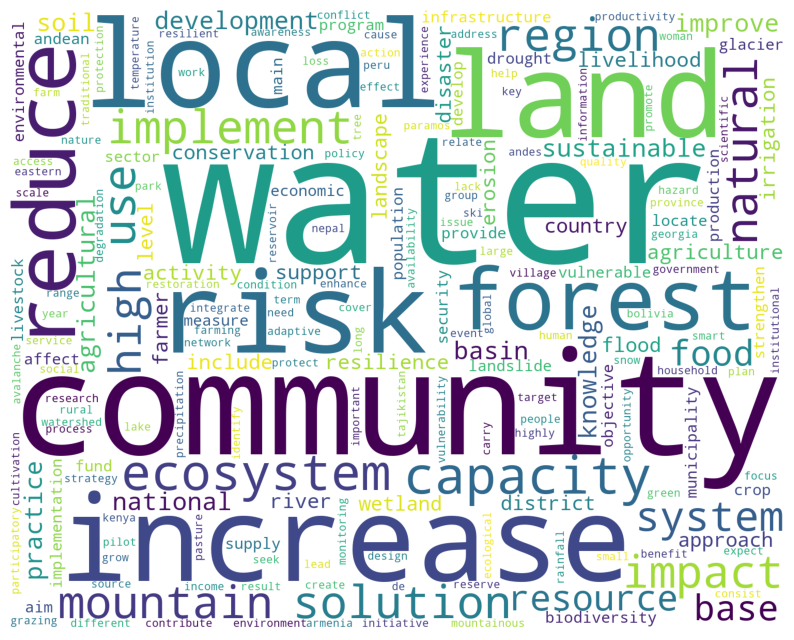

In [16]:
plt.figure(figsize=(10,15))
plt.imshow(wc)
plt.axis('off')
plt.savefig('../Figures_ver7/world_cloud.png', dpi='figure',
    bbox_inches='tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)

In [12]:
nlp.Defaults.stop_words |= {"barrier","identify","adverse", "effects","non", "effect","problem","challenge"}

In [13]:
stop_words_3 = nlp.Defaults.stop_words

In [14]:
wc3, df2['barriers_lemmatize'] = make_cloud(df2['Barriers and adverse effects'],100,stop_words_3)

/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_5527/1249894131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc3, df2['barriers_lemmatize'] = make_cloud(df2['Barriers and adverse effects'],100,stop_words_3)


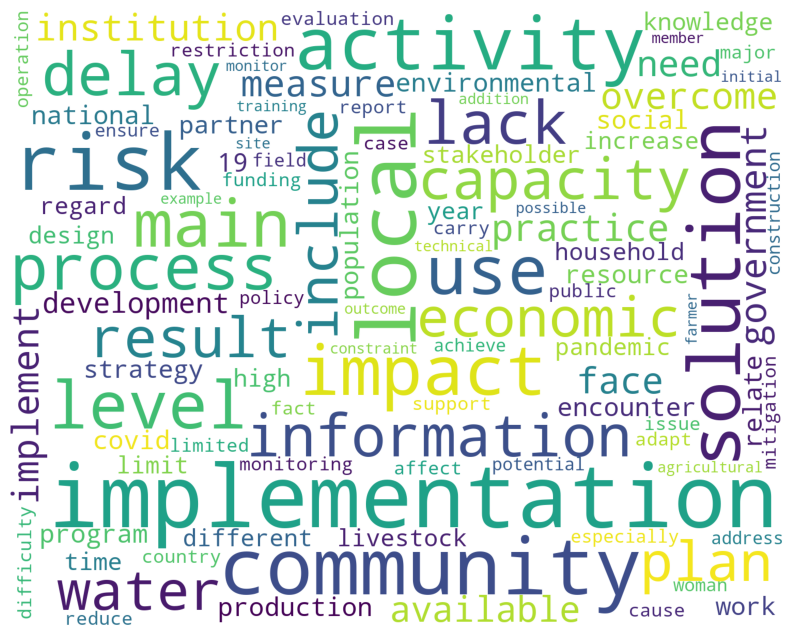

In [15]:
plt.figure(figsize=(10,15))
plt.imshow(wc3)
plt.axis('off')
plt.savefig('..//Figures_ver3/wc_barriers.png', dpi='figure',facecolor='auto', edgecolor='auto',pad_inches=0.1)

In [16]:
df3 = df.iloc[:, np.r_[0:2, 31, 34:36, 47:49]]

In [17]:
df3.replace(np.nan,'',regex=True,inplace=True)

/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_5527/2339263115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.replace(np.nan,'',regex=True,inplace=True)


In [18]:
nlp.Defaults.stop_words |= {"innovative", "solution", "innovation", "approach", "use", "consider", "activity", "include",
                           "reduce", "design","increase"}

In [19]:
stop_words_5 = nlp.Defaults.stop_words

In [21]:
wc4,df3['Innovation_lemmatize'] = make_cloud(df3['Innovation'],300,stop_words_5)

/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_5527/1811485590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc4,df3['Innovation_lemmatize'] = make_cloud(df3['Innovation'],300,stop_words_5)


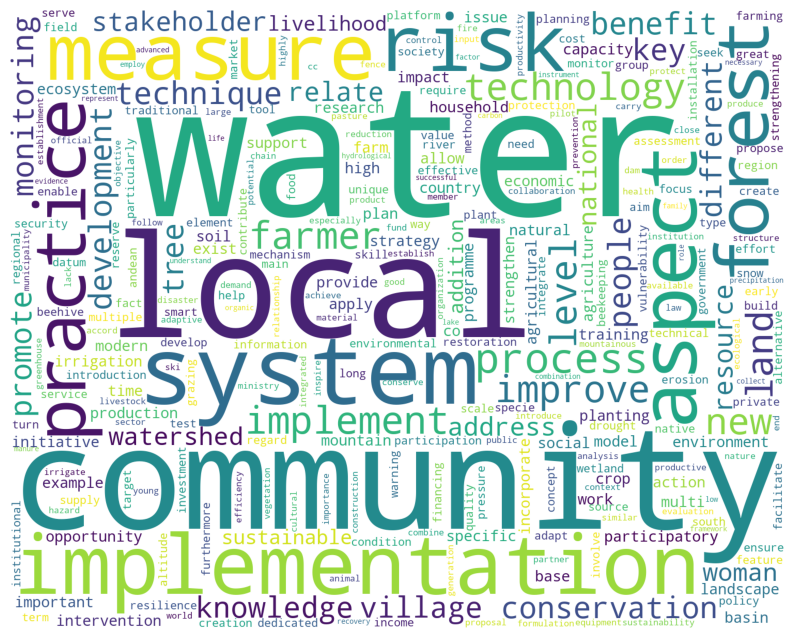

In [22]:
plt.figure(figsize=(10,15))
plt.imshow(wc4)
plt.axis('off')
plt.savefig('..//Figures_ver4/innovation.png', dpi='figure',facecolor='auto', edgecolor='auto',pad_inches=0.1)

In [ ]:
del df3, wc4

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nlp.Defaults.stop_words |= {"climate","change","climatic","changes","climat", "changing", "chang",
                           "project", "projects", "ll","ve","adaptation","area", "component", "management"}

In [ ]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=nlp.Defaults.stop_words)

In [ ]:
dtm = tfidf.fit_transform(df2['body_lemmatized'])

In [ ]:
nmf_model = NMF(n_components=6,random_state=42)

In [ ]:
nmf_model.fit(dtm)

In [ ]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 3 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-2:]])
    print('\n')

In [ ]:
topic_df3 = pd.DataFrame(
    nmf_model.transform(dtm), 
    columns=["topic_{}".format(i) for i in range(6)]
).astype(float)
topic_df3.index = df2.index
df2 = pd.concat([df2, topic_df3], axis=1)

In [ ]:
topic_results = nmf_model.transform(dtm)

In [ ]:
df2['Topic'] = topic_results.argmax(axis=1)

In [ ]:
my_topic_dic = {0: 'Water', 1:'Ecosystem_Water_Wetland', 2: 'Community_Risk', 3: 'Community_Forest', 4: 
          'Erosion_Landslide', 5 : 'Snow_Ski'}

In [ ]:
df2['Topic Label'] =df2['Topic'].map(my_topic_dic)

In [ ]:
df2.rename(columns={'topic_0': 'Water', 'topic_1': 'Ecosystem_Water_Wetland','topic_2': 'Community_Risk',
                          'topic_3': 'Community_Forest', 'topic_4': 
                    'Erosion_Landslide','topic_5': 'Snow_Ski'}, inplace = True)

In [ ]:
aa= df2[["Water", "Ecosystem_Water_Wetland", "Community_Risk","Community_Forest","Erosion_Landslide","Snow_Ski"]].corr()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(aa, ax=ax, annot=True, cmap='YlGnBu',)
ax.set_xticklabels(labels =ax.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor")
ax.tick_params(axis='both', labelsize=8)
plt.tight_layout()

In [ ]:
from sklearn.manifold import TSNE

tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=50, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(topic_results)

In [ ]:
tsne_lsa_vectors = pd.DataFrame(tsne_lsa_vectors,columns=['x','y'])
tsne_lsa_vectors['hue'] = topic_results.argmax(axis=1)

In [ ]:
topics = ["Water", 
          "Ecosystem_Water_Wetland", 
          "Community_Risk","Community_Forest",
          "Erosion_Landslide",
          "Snow_Ski"]

In [ ]:
data = tsne_lsa_vectors

In [ ]:
#Each time you restart the kernel, run this one, if there is an errot, run the next one, this one again and then the
# next one
import matplotlib.patches as mpatches
legend_list = []
colors = []
for i in range(len(topics)):
    idx = np.where(data['hue']==i)[0][0]
    color = scatter.get_facecolors()[idx]
    colors.append(color)
    legend_list.append(mpatches.Ellipse((0, 0), 1, 1, fc=color))

In [ ]:
legend = []
fig, axs = plt.subplots(1,1, figsize=(7, 7), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.001)
data = tsne_lsa_vectors
scatter = plt.scatter(data=data,x='x',y='y',s=20,c=data['hue'], cmap="Set1")
fig.legend(legend_list,topics,loc=(0.233,0.84),ncol=2, fontsize = 8)
plt.suptitle("Solutions clustered based on description",**{'fontsize':'14','weight':'bold'})
plt.subplots_adjust(top=0.83)
#plt.axis('off')
#plt.show()

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 18 columns):
 #   Column                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                            --------------  ----- 
 0   Title                                                                                                                             88 non-null     object
 1   Body                                                                                                                              88 non-null     object
 2   Performance evaluation                                                                                                            88 non-null     object
 3   Long term project sustainability and maintenance                                                      

In [18]:
df3 = df2.iloc[:, np.r_[0:2, 5,7,9,11,13]]

In [19]:
df3.rename(columns={ df3.columns[2]: "Knowledge capacities" }, inplace = True)
df3.rename(columns={ df3.columns[3]: "Technology capacities" }, inplace = True)
df3.rename(columns={ df3.columns[4]: "Political/Legal capacities" }, inplace = True)
df3.rename(columns={ df3.columns[5]: "Institutional capacities" }, inplace = True)
df3.rename(columns={ df3.columns[6]: "Socio-cultural capacities" }, inplace = True)

/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_32892/1632763001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns={ df3.columns[2]: "Knowledge capacities" }, inplace = True)
/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_32892/1632763001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns={ df3.columns[3]: "Technology capacities" }, inplace = True)
/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_32892/1632763001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

In [20]:
df3.columns

Index(['Title', 'Body', 'Knowledge capacities', 'Technology capacities',
       'Political/Legal capacities', 'Institutional capacities',
       'Socio-cultural capacities'],
      dtype='object')

In [21]:
df3.iloc[:,2:7].replace('',np.nan,regex=True,inplace=True)

/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_32892/3783596861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.iloc[:,2:7].replace('',np.nan,regex=True,inplace=True)


In [22]:
df3.iloc[:,2:7]= df3.iloc[:,2:7].astype(float)

/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_32892/1622138600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.iloc[:,2:7]= df3.iloc[:,2:7].astype(float)


In [23]:
df3.iloc[:,2:] = df3.iloc[:,2:].astype(float)

/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_32892/1103948239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.iloc[:,2:] = df3.iloc[:,2:].astype(float)


In [24]:
cols = ['Knowledge capacities', 'Technology capacities', 
        'Political/Legal capacities','Institutional capacities',
       'Socio-cultural capacities']
df3[cols] = df3[cols].apply(pd.to_numeric, axis=1)

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       88 non-null     object 
 1   Body                        88 non-null     object 
 2   Knowledge capacities        67 non-null     float64
 3   Technology capacities       62 non-null     float64
 4   Political/Legal capacities  63 non-null     float64
 5   Institutional capacities    61 non-null     float64
 6   Socio-cultural capacities   64 non-null     float64
dtypes: float64(5), object(2)
memory usage: 4.9+ KB


/var/folders/hd/n13870fj1mv_x9bv1cytjvk80000gn/T/ipykernel_32892/1758965251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[cols] = df3[cols].apply(pd.to_numeric, axis=1)


In [25]:
df3.iloc[:,2:7].mean(axis =1).round()

0     4.0
1     3.0
2     4.0
3     NaN
4     NaN
     ... 
83    5.0
84    5.0
85    4.0
86    NaN
87    NaN
Length: 88, dtype: float64

In [26]:
df3 = df3.fillna(0)

In [ ]:
file_path_2 = '../Figures_ver4/'

In [ ]:
#Figure using histogram just to check the distribution
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 5, figsize=(15, 4))
sns.histplot(data=df3, x=df3['Knowledge capacities'], color="skyblue", label="Knowledge", bins= 5, ax=axs[0])
axs[0].set_ylim([0, 60])
sns.histplot(data=df3, x=df3['Technology capacities'], color="red", label="Technology", bins =5, ax=axs[1])
axs[1].set_ylim([0, 60])
sns.histplot(data=df3, x=df3['Political/Legal capacities'], color="gold", label="Political/Legal", bins= 5, ax=axs[2])
axs[2].set_ylim([0, 60])
sns.histplot(data=df3,  x=df3['Socio-cultural capacities'], color="teal", label="Socio-cultural", bins =5, ax=axs[3])
axs[3].set_ylim([0, 60])
sns.histplot(data=df3,  x=df3['Institutional capacities'], color="green", label="Institutional", bins =5, ax=axs[4])
axs[4].set_ylim([0, 60])
plt.tight_layout()
figure_name = 'Capacities'
plt.savefig(
    file_path_2 + figure_name + '.png',
       bbox_inches='tight', dpi = 400)
plt.show()

In [32]:
# Hardcoded example to feed in the survey function for check

category_names = ['NA', 'Very low',
                  'Low', 'Medium', 'High','Very High']
results = {
    'Knowledge capacities':         [20, 0, 0, 4, 7,48],   
    'Technology capacities':        [20, 1, 4, 16,22,16],
    'Political / Legal capacities': [21, 3, 4, 4, 22,25],
    'Institutional capacities':     [21, 0, 1, 8, 6,43],
    'Socio-cultural capacities':    [21, 0, 2, 5, 11,40],
}

In [ ]:
#Here you register a new color. If the cell has been run once it means the color is already registered
#then you dopn't need to run it again
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
colors = ["#C0C0C0", "#fdae61", "#fee08b", "#d9ef8b", "#a6d96a","#66bd63"]
my_cmap_2 = ListedColormap(colors, name="my_cmap_2")
matplotlib.colormaps.register(cmap=my_cmap_2)

In [76]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    #category_colors = plt.colormaps['RdYlGn'](
    #    np.linspace(0.15, 0.85, data.shape[1]))
    category_colors = plt.colormaps['my_cmap_2'](
       np.linspace(0.15, 0.85, data.shape[1]))
    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        if any(starts):
            rects = ax.barh(labels,widths,left=starts, height=0.5,
                        label=colname, color=color)
        else:
            #starts = data_cum[:, i]- widths
            rects = ax.barh(labels,widths,left=starts, height=0.5,
                        label=colname, color=color)
            
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

#survey(results, category_names)
#figure_name = 'Capacities_Likert'
#plt.savefig(
#    file_path_2 + figure_name + '.svg',
#       bbox_inches='tight', dpi = 400)
#plt.show()

In [72]:
df4 = df3.iloc[:,2:]

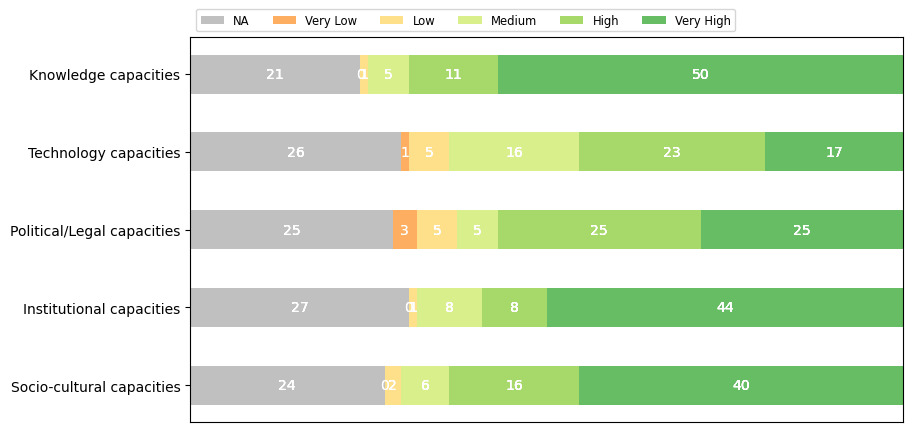

In [77]:
#Create a new dataframe called new from the dataframe df4 to avoid hardcoding
new = pd.DataFrame(columns=["NA", "Very Low", "Low","Medium", "High","Very High"])
# using for loop to iterate
for i in range(6):
    column = new.columns[i]
    new[column] = (df4==i).sum() 
# make the new columns into a list so that the function survey can accept as argumen
category_names = list(new.columns)
# call the function survey to generate the figure
g = survey(new.T.to_dict('list'),category_names)
figure_name = 'Capacities_Likert'
#Save figure
plt.savefig(
    file_path_2 + figure_name + '.svg',
       bbox_inches='tight', dpi = 400)